In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

In [2]:
import os

In [3]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


### loading dataset

In [5]:
data_path = '/content/drive/MyDrive/gachon4-2/deeplearning/week2/wine'

In [6]:
df = pd.DataFrame(pd.read_csv(os.path.join(data_path,"wine.csv")))

In [7]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


array([[<Axes: title={'center': 'Wine'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic.acid'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Acl'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoid.phenols'}>,
        <Axes: title={'center': 'Proanth'}>,
        <Axes: title={'center': 'Color.int'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'OD'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

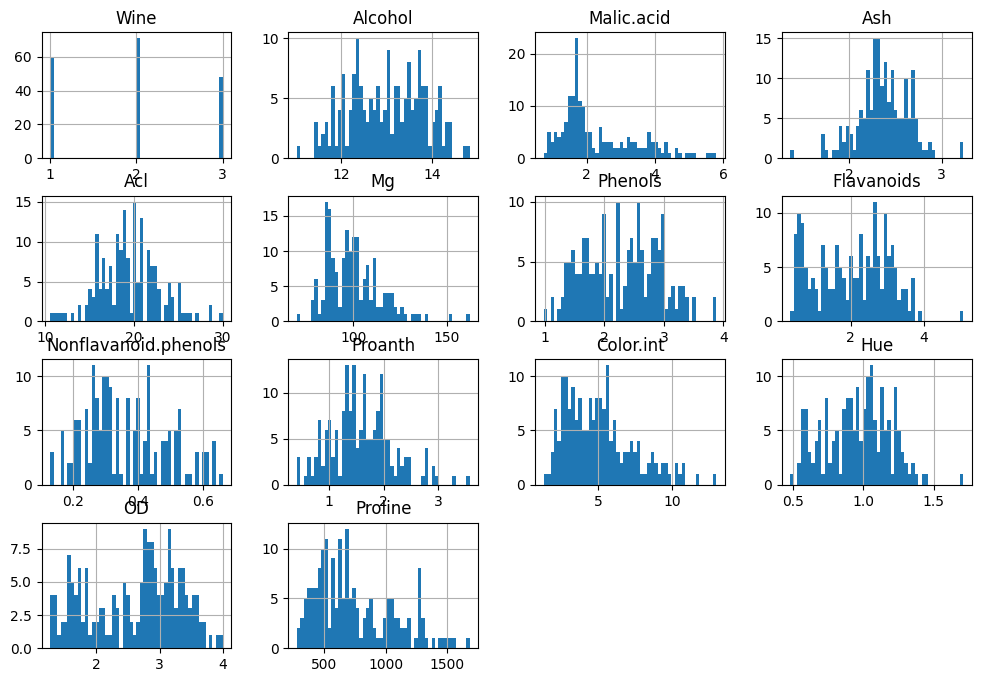

In [27]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))

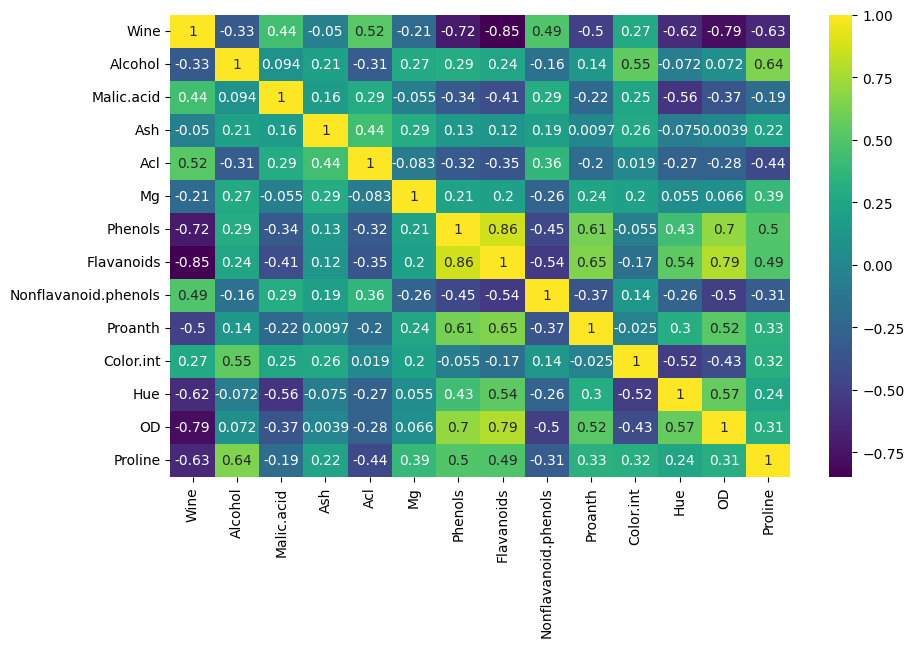

In [28]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis");

In [10]:
df.keys()

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [11]:
X = df[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline']].values
Y = df['Wine'].values

In [12]:
import numpy as np
print("lable class : ", np.unique(Y))

lable class :  [1 2 3]


In [13]:
print(X[:3])
print(Y[:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]
[1 1 1]


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1, shuffle=True)

In [17]:
print(len(X_train),len(Y_train))
print(len(X_test), len(Y_test))

160 160
18 18


### 1) "Decision Tree" model

In [21]:
# 1. train the decision tree classifier
#scikit learn decision tree model training
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

# 2. test the model trained on test set
DT.predict(X_test)
prediction = DT.predict(X_test)

# 3. perform evaluation on test set
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
print(classification_report(Y_test, prediction))
print('Accuracy Score:', metrics.accuracy_score(Y_test, prediction))

cm = confusion_matrix(Y_test, prediction)
print(cm)

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.78      1.00      0.88         7
           3       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.93      0.87      0.89        18
weighted avg       0.91      0.89      0.89        18

Accuracy Score: 0.8888888888888888
[[6 1 0]
 [0 7 0]
 [0 1 3]]


### 2) "LogisticRegression" model

In [23]:
from sklearn.linear_model import LogisticRegression

# 1. train the LogisticRegression classifier
clf = LogisticRegression()
clf = clf.fit(X_train, Y_train)

# 2. test the model trained on test set
clf.predict(X_test)
prediction = clf.predict(X_test)

# 3. perform evaluation on test set
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
print(classification_report(Y_test, prediction))
print('Accuracy Score:', metrics.accuracy_score(Y_test, prediction))

cm = confusion_matrix(Y_test, prediction)
print(cm)

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4

    accuracy                           0.94        18
   macro avg       0.96      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18

Accuracy Score: 0.9444444444444444
[[6 1 0]
 [0 7 0]
 [0 0 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3) "RandomForestClassifier" model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# 1. train the LogisticRegression classifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf = clf.fit(X_train, Y_train)

# 2. test the model trained on test set
clf.predict(X_test)
prediction = clf.predict(X_test)

# 3. perform evaluation on test set
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
print(classification_report(Y_test, prediction))
print('Accuracy Score:', metrics.accuracy_score(Y_test, prediction))

cm = confusion_matrix(Y_test, prediction)
print(cm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy Score: 1.0
[[7 0 0]
 [0 7 0]
 [0 0 4]]


### 4) "SVM" model

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(X_train, Y_train)

# 2. test the model trained on test set
clf.predict(X_test)
prediction = clf.predict(X_test)

# 3. perform evaluation on test set
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
print(classification_report(Y_test, prediction))
print('Accuracy Score:', metrics.accuracy_score(Y_test, prediction))

cm = confusion_matrix(Y_test, prediction)
print(cm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy Score: 1.0
[[7 0 0]
 [0 7 0]
 [0 0 4]]
